In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [5]:
# Load data saved locally
path = '../data/'
filename = 'loans.csv'
df = pd.read_csv(path+filename)

In [3]:
# Load data from Github if using colab
!git clone https://github.com/DeltaAnalytics/machine_learning_for_good_data
df = pd.read_csv("machine_learning_for_good_data/loans.csv")

^C


In [6]:
# Drop everything that is not numeric
df = df.select_dtypes(exclude=['object'])

In [7]:
y_column = 'loan_amount'
y = df[y_column]
# Drop returns a copy of the DataFrame with the specified columns removed  
X = df.drop([y_column, "id_number"], axis=1) # id_number will not be helpful

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = GradientBoostingRegressor(n_estimators = 100, max_depth=3, min_samples_leaf = 1000, learning_rate = 0.1,random_state=1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.4135702905845625
0.3595628480136256


In [17]:
importance_df = pd.DataFrame(model.feature_importances_, index = list(X), columns = ["importances"])
importance_df.sort_values(by = "importances", ascending = False, inplace = True)
print(importance_df)

                importances
funded_amount      0.372465
repayment_term     0.372102
lender_count       0.255433


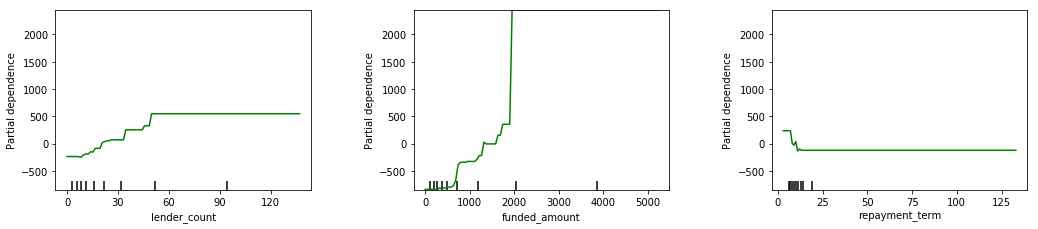

In [21]:
features = [i for i in range(0,len(list(X)))]
fig,axs = plot_partial_dependence(model, X_train, features,feature_names = list(X),
                                  n_jobs=1, grid_resolution=100)
plt.subplots_adjust(bottom=1, right=1, top=2)

fig.set_figwidth(15)
fig.set_figheight(2.5)